In [4]:
import pandas as pd
import numpy as np
from simulator import conduct_simulation

# Experiments

# Input data processing
df = pd.read_table('wine.data', header=None)
raw_data = np.array(df)
pro_data = [[],[],[]]
for item in raw_data:
    pro_item = str(item[0]).split(',')
    pro_item = [eval(pro_item[i]) for i in range(5)]
    pro_item.insert(len(pro_item), pro_item[0])
    pro_item.remove(pro_item[0])
    
    if pro_item[4] == 1:    
        pro_item[4] = 0
        pro_data[0].append(pro_item)
    if pro_item[4] == 2: 
        pro_item[4] = 1
        pro_data[1].append(pro_item)
    if pro_item[4] == 3: 
        pro_item[4] = 2
        pro_data[2].append(pro_item)

# Components for GMM model
components_num = 2

# Proportion of training and test sets
train_ratio_list = np.array([0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# train_ratio_list = np.array([0.9])

# Monte Carlo experiments num
N = 100

# Simulation
mean_accuracy_classical, mean_accuracy_quantum_32, mean_accuracy_quantum_1024 = conduct_simulation(pro_data, train_ratio_list, components_num, N)


Train Ratio: 0.3
Iteration number: 0
Iteration number: 10
Iteration number: 20
Iteration number: 30
Iteration number: 40
Iteration number: 50
Iteration number: 60
Iteration number: 70
Iteration number: 80
Iteration number: 90
Train Ratio: 0.4
Iteration number: 0
Iteration number: 10
Iteration number: 20
Iteration number: 30
Iteration number: 40
Iteration number: 50
Iteration number: 60
Iteration number: 70
Iteration number: 80
Iteration number: 90
Train Ratio: 0.5
Iteration number: 0
Iteration number: 10
Iteration number: 20
Iteration number: 30
Iteration number: 40
Iteration number: 50
Iteration number: 60
Iteration number: 70
Iteration number: 80
Iteration number: 90
Train Ratio: 0.6
Iteration number: 0
Iteration number: 10
Iteration number: 20
Iteration number: 30
Iteration number: 40
Iteration number: 50
Iteration number: 60
Iteration number: 70
Iteration number: 80
Iteration number: 90
Train Ratio: 0.7
Iteration number: 0
Iteration number: 10
Iteration number: 20
Iteration number:

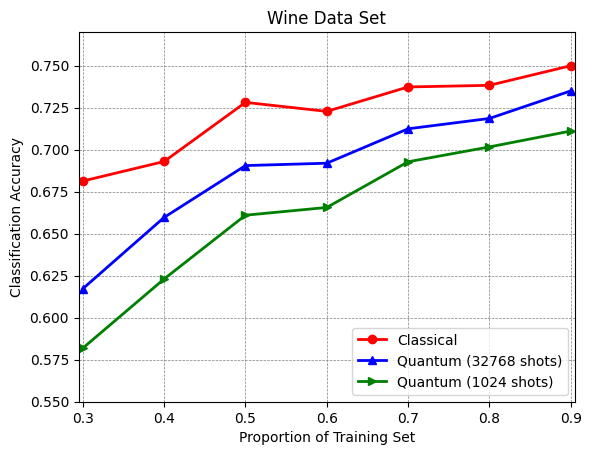

In [22]:
from plot_figure import plot_figure

# Plot
# plot_figure("Wine Data Set", 0.5, 0.98, train_ratio_list, mean_accuracy_classical, mean_accuracy_quantum_32, mean_accuracy_quantum_1024, "wine.pdf")


import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(111)
lns1 = ax1.plot(train_ratio_list, mean_accuracy_classical, '-or', linewidth = 2.0, label = 'Classical')
lns2 = ax1.plot(train_ratio_list, mean_accuracy_quantum_32, '-^b', linewidth = 2.0, label = 'Quantum (32768 shots)')
lns3 = ax1.plot(train_ratio_list, mean_accuracy_quantum_1024, '->g', linewidth = 2.0, label = 'Quantum (1024 shots)')

plt.grid(color='gray', linestyle='--', linewidth=0.5)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='lower right')
ax1.set_xlim(0.295,0.905)
ax1.set_ylim(0.55, 0.77)
ax1.set_ylabel("Classification Accuracy")
ax1.set_xlabel("Proportion of Training Set")
plt.title("Wine Data Set")
plt.savefig("Wine.pdf", dpi=400)

In [11]:
[mean_accuracy_classical, mean_accuracy_quantum_32, mean_accuracy_quantum_1024]

[array([0.68136   , 0.69299065, 0.72818182, 0.7228169 , 0.73735849,
        0.73833333, 0.75      ]),
 array([0.61728   , 0.65971963, 0.69056818, 0.69197183, 0.71245283,
        0.71861111, 0.735     ]),
 array([0.58192   , 0.62308411, 0.66102273, 0.6656338 , 0.69283019,
        0.70166667, 0.71111111])]